<a href="https://colab.research.google.com/github/tienducvu03/Data-Science-Projects/blob/main/Finance_Mortgage_loan_analysist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the data

### Subtask:
Load the data from the "/content/Cleaned_Finance_Mortgage_Loan_Application (1).xlsx" file into a pandas DataFrame.


**Reasoning**:
Import pandas, read the Excel file into a DataFrame, and display the head and info.



In [ ]:
import pandas as pd

df = pd.read_excel("/content/Cleaned_Finance_Mortgage_Loan_Application (1).xlsx")

display(df.head())
display(df.info())

,Financial Key,Borrower Key,Property Key,Loan Key,Years At Address,Loan Amount,Purchase Price,Number of Units,Monthly Income,Bonuses,Commission,Other Income,Checking,Savings,Retirement Fund,Mutual Fund,Defaulted
0,1.0,1.0,1.0,1.0,5,494536.966205,459560,1,6141.269177,759,0,0,5000,0,0,0,1
1,2.0,2.0,2.0,2.0,4,95167.831195,104480,1,13114.113609,0,0,0,0,0,0,0,0
2,3.0,3.0,3.0,3.0,2,337826.338414,389089,1,11068.348361,0,0,0,0,30000,0,0,1
3,4.0,4.0,4.0,4.0,3,582816.789680,632804,1,8633.222020,813,0,0,0,0,0,0,1
4,5.0,5.0,5.0,5.0,6,295019.610666,351239,1,6528.779789,0,0,0,0,6000,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Financial Key     3000 non-null   float64
 1   Borrower Key      3000 non-null   float64
 2   Property Key      3000 non-null   float64
 3   Loan Key          3000 non-null   float64
 4   Years At Address  3000 non-null   int64  
 5   Loan Amount       3000 non-null   float64
 6   Purchase Price    3000 non-null   int64  
 7   Number of Units   3000 non-null   int64  
 8   Monthly Income    3000 non-null   float64
 9   Bonuses           3000 non-null   int64  
 10  Commission        3000 non-null   int64  
 11  Other Income      3000 non-null   int64  
 12  Checking          3000 non-null   int64  
 13  Savings           3000 non-null   int64  
 14  Retirement Fund   3000 non-null   int64  
 15  Mutual Fund       3000 non-null   int64  
 16  Defaulted         3000 non-null   int64  


None

## Explore and preprocess data

### Subtask:
Examine the data for missing values, outliers, and data types. Perform necessary preprocessing steps such as encoding categorical variables, scaling numerical features, and handling missing values.


**Reasoning**:
Check for missing values and their counts, and identify numerical and categorical columns.



In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("\nNumerical columns:")
print(numerical_cols)

print("\nCategorical columns:")
print(categorical_cols)

Missing values per column:
Financial Key       0
Borrower Key        0
Property Key        0
Loan Key            0
Years At Address    0
Loan Amount         0
Purchase Price      0
Number of Units     0
Monthly Income      0
Bonuses             0
Commission          0
Other Income        0
Checking            0
Savings             0
Retirement Fund     0
Mutual Fund         0
Defaulted           0
dtype: int64

Numerical columns:
Index(['Financial Key', 'Borrower Key', 'Property Key', 'Loan Key',
       'Years At Address', 'Loan Amount', 'Purchase Price', 'Number of Units',
       'Monthly Income', 'Bonuses', 'Commission', 'Other Income', 'Checking',
       'Savings', 'Retirement Fund', 'Mutual Fund', 'Defaulted'],
      dtype='object')

Categorical columns:
Index([], dtype='object')


**Reasoning**:
Since there are no missing values and no categorical columns, we will visualize the distribution of numerical columns to identify potential outliers. We will exclude the key columns and the target variable 'Defaulted' from the visualization.



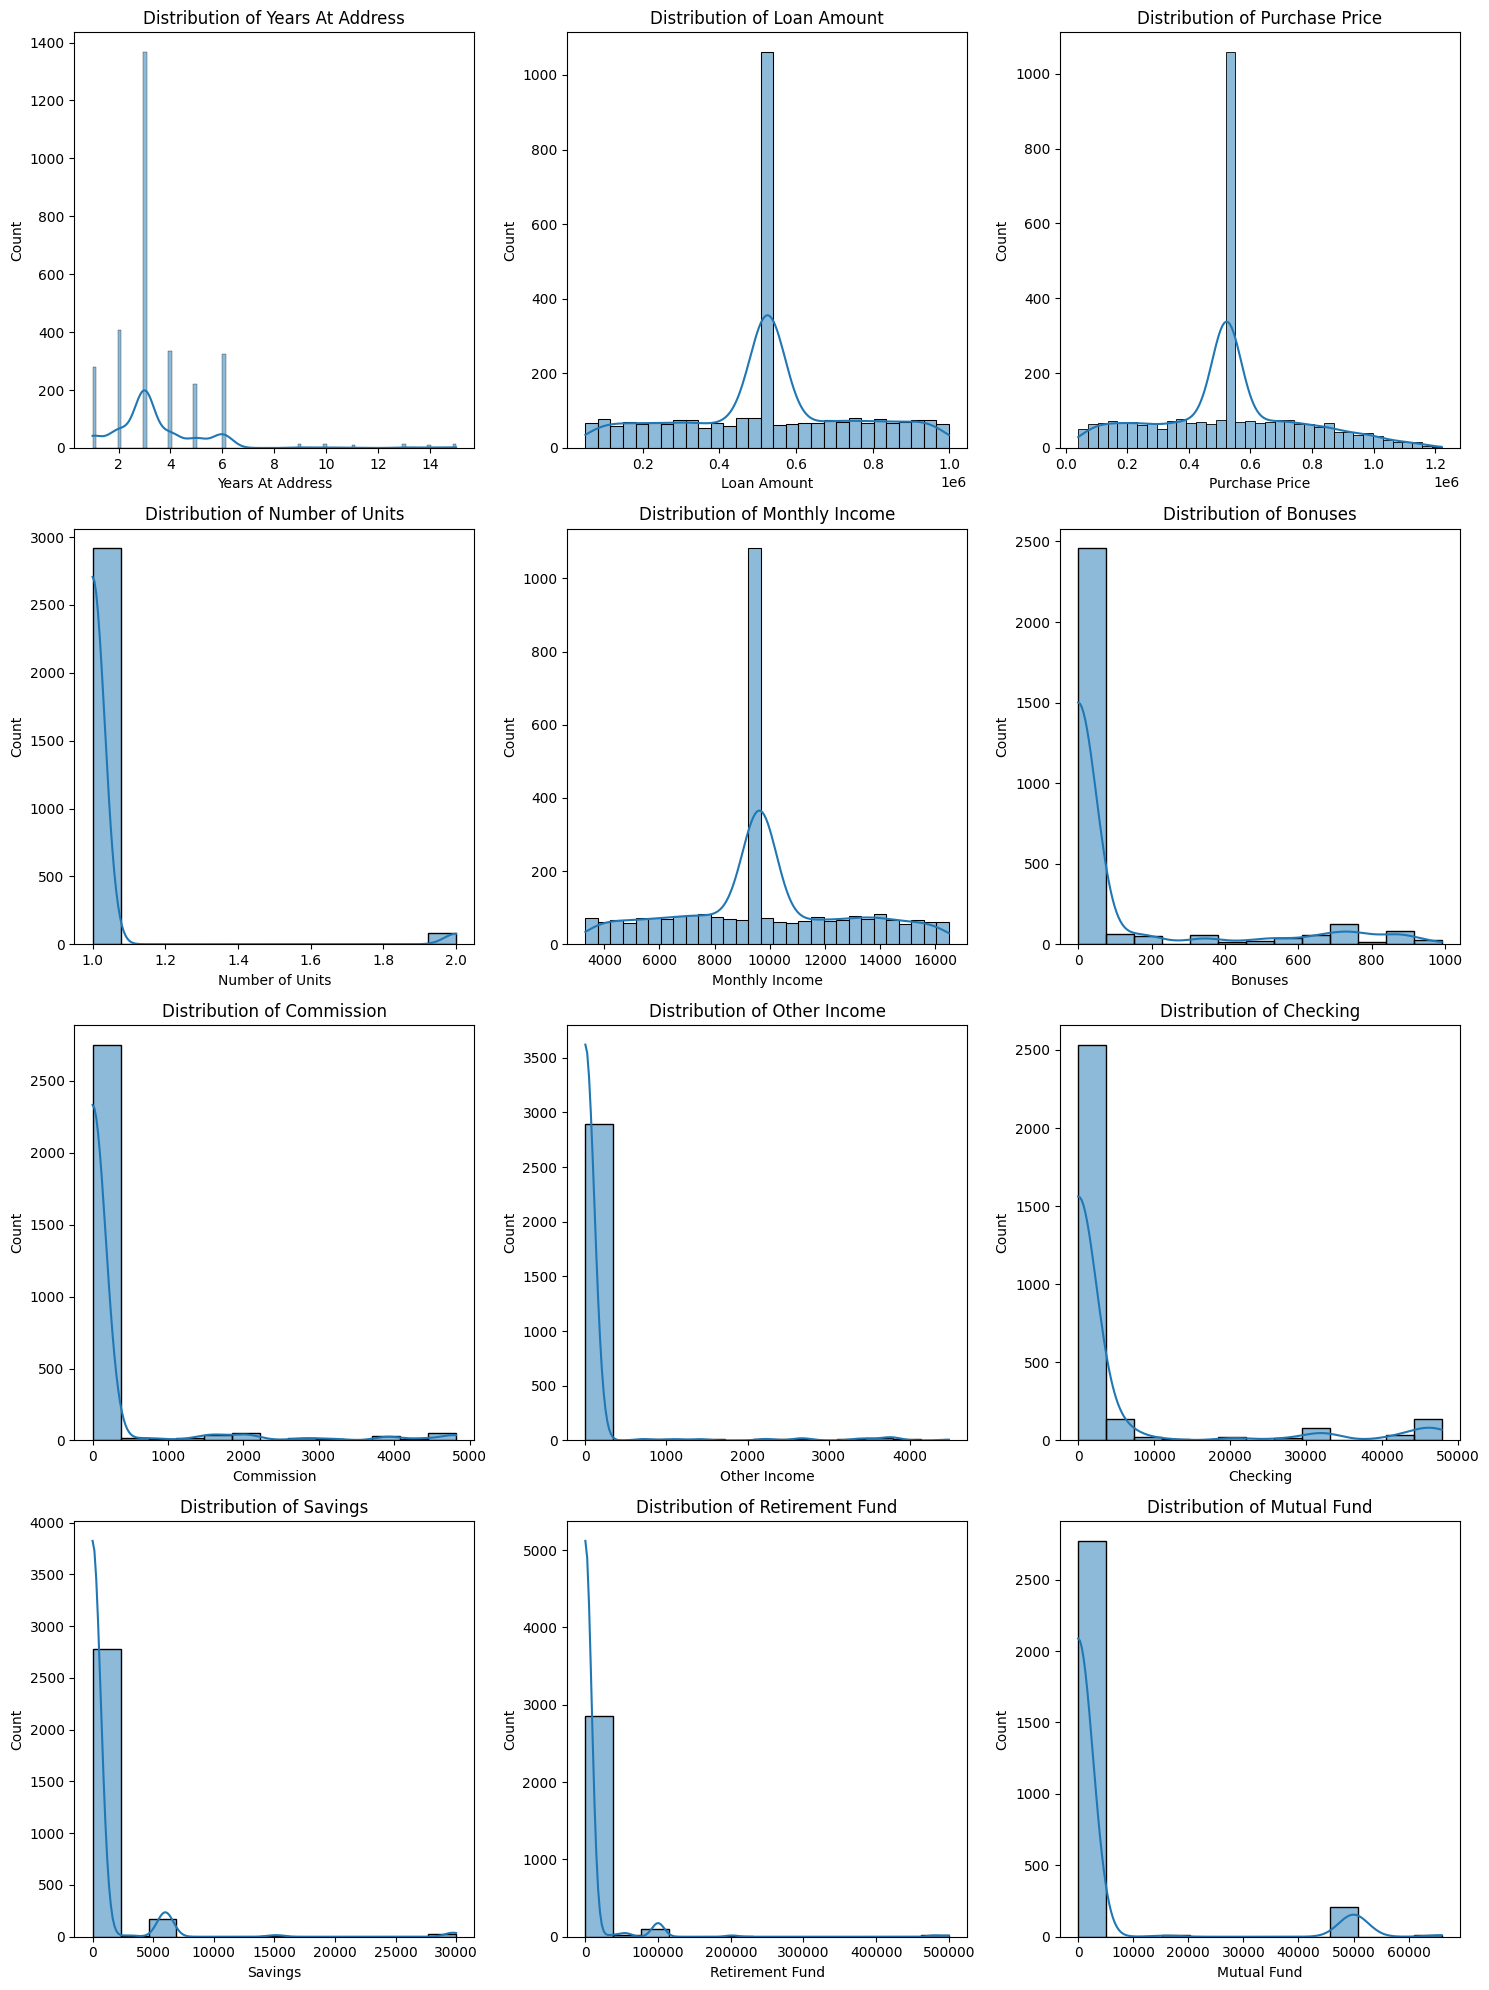

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_to_plot = numerical_cols.drop(['Financial Key', 'Borrower Key', 'Property Key', 'Loan Key', 'Defaulted'])

n_cols = 3
n_rows = (len(numerical_cols_to_plot) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 5))

for i, col in enumerate(numerical_cols_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**Reasoning**:
Based on the histograms, some numerical columns like 'Loan Amount', 'Purchase Price', 'Monthly Income', 'Bonuses', 'Commission', 'Other Income', 'Checking', 'Savings', 'Retirement Fund', and 'Mutual Fund' show skewed distributions and potential outliers. We will cap the outliers in these columns using the 99th percentile. We will then scale all numerical features (excluding the key columns and the target variable) using StandardScaler.



In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Capping outliers
for col in ['Loan Amount', 'Purchase Price', 'Monthly Income', 'Bonuses', 'Commission', 'Other Income', 'Checking', 'Savings', 'Retirement Fund', 'Mutual Fund']:
    upper_limit = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

# Scaling numerical features
numerical_cols_to_scale = numerical_cols.drop(['Financial Key', 'Borrower Key', 'Property Key', 'Loan Key', 'Defaulted'])
scaler = StandardScaler()
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

display(df.head())

,Financial Key,Borrower Key,Property Key,Loan Key,Years At Address,Loan Amount,Purchase Price,Number of Units,Monthly Income,Bonuses,Commission,Other Income,Checking,Savings,Retirement Fund,Mutual Fund,Defaulted
0,1.0,1.0,1.0,1.0,0.798710,-0.152675,-0.292057,-0.168683,-1.181290,2.676147,-0.268571,-0.178947,0.069611,-0.252663,-0.23036,-0.284341,1
1,2.0,2.0,2.0,2.0,0.276791,-1.933177,-1.817169,-0.168683,1.104098,-0.420493,-0.268571,-0.178947,-0.351448,-0.252663,-0.23036,-0.284341,0
2,3.0,3.0,3.0,3.0,-0.767047,-0.851336,-0.594739,-0.168683,0.433587,-0.420493,-0.268571,-0.178947,-0.351448,6.628121,-0.23036,-0.284341,1
3,4.0,4.0,4.0,4.0,-0.245128,0.240901,0.452046,-0.168683,-0.364539,2.896461,-0.268571,-0.178947,-0.351448,-0.252663,-0.23036,-0.284341,1
4,5.0,5.0,5.0,5.0,1.320629,-1.042181,-0.757309,-0.168683,-1.054281,-0.420493,-0.268571,-0.178947,-0.351448,2.476182,-0.23036,-0.284341,0


## Split data

### Subtask:
Split the preprocessed data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(['Financial Key', 'Borrower Key', 'Property Key', 'Loan Key', 'Defaulted'], axis=1)
y = df['Defaulted']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (features):", X_train.shape)
print("Testing set shape (features):", X_test.shape)
print("Training set shape (target):", y_train.shape)
print("Testing set shape (target):", y_test.shape)

Training set shape (features): (2400, 12)
Testing set shape (features): (600, 12)
Training set shape (target): (2400,)
Testing set shape (target): (600,)


## Choose and train models

### Subtask:
Select appropriate machine learning models for the task (e.g., classification or regression depending on the target variable). Train the chosen models on the training data.


**Reasoning**:
The target variable 'Defaulted' is binary (0 or 1), indicating a classification problem. I will choose two common classification models, Logistic Regression and Random Forest Classifier, instantiate them, and train them on the training data.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Instantiate the models
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

# Train the models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

print("Logistic Regression model trained.")
print("Random Forest Classifier model trained.")

Logistic Regression model trained.
Random Forest Classifier model trained.


## Hyperparameter tuning

### Subtask:
Use techniques like GridSearchCV or RandomizedSearchCV to tune the hyperparameters of the selected models to improve their performance.


**Reasoning**:
Import GridSearchCV and define parameter grids for LogisticRegression and RandomForestClassifier. Then, instantiate GridSearchCV for both models and fit them to the training data. Finally, print the best hyperparameters found and store the best models.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Logistic Regression
log_reg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'] # 'l1' and 'elasticnet' require different solvers
}

# Instantiate GridSearchCV for Logistic Regression
log_reg_grid_search = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42),
                                   log_reg_param_grid,
                                   cv=5,
                                   scoring='roc_auc')

# Fit GridSearchCV to the training data for Logistic Regression
log_reg_grid_search.fit(X_train, y_train)

# Print the best hyperparameters for Logistic Regression
print("Best hyperparameters for Logistic Regression:", log_reg_grid_search.best_params_)

# Define parameter grid for Random Forest Classifier
rf_clf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

# Instantiate GridSearchCV for Random Forest Classifier
rf_clf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                                  rf_clf_param_grid,
                                  cv=5,
                                  scoring='roc_auc')

# Fit GridSearchCV to the training data for Random Forest Classifier
rf_clf_grid_search.fit(X_train, y_train)

# Print the best hyperparameters for Random Forest Classifier
print("Best hyperparameters for Random Forest Classifier:", rf_clf_grid_search.best_params_)

# Store the best performing models
best_log_reg = log_reg_grid_search.best_estimator_
best_rf_clf = rf_clf_grid_search.best_estimator_

Best hyperparameters for Logistic Regression: {'C': 100, 'penalty': 'l2'}
Best hyperparameters for Random Forest Classifier: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}


## Evaluate models

### Subtask:
Evaluate the performance of the tuned models on the testing data using appropriate metrics.


**Reasoning**:
Import necessary evaluation metrics from sklearn.



In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

**Reasoning**:
Evaluate the tuned Logistic Regression model on the test data using accuracy, ROC AUC, confusion matrix, and classification report.



In [ ]:
# Evaluate Logistic Regression
y_pred_log_reg = best_log_reg.predict(X_test)
y_prob_log_reg = best_log_reg.predict_proba(X_test)[:, 1]

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)

print("--- Logistic Regression Evaluation ---")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"ROC AUC: {roc_auc_log_reg:.4f}")
print("Confusion Matrix:")
print(conf_matrix_log_reg)
print("Classification Report:")
print(class_report_log_reg)

--- Logistic Regression Evaluation ---
Accuracy: 0.8433
ROC AUC: 0.8673
Confusion Matrix:
[[281  15]
 [ 79 225]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       296
           1       0.94      0.74      0.83       304

    accuracy                           0.84       600
   macro avg       0.86      0.84      0.84       600
weighted avg       0.86      0.84      0.84       600



**Reasoning**:
Evaluate the tuned Random Forest Classifier model on the test data using accuracy, ROC AUC, confusion matrix, and classification report.



In [ ]:
# Evaluate Random Forest Classifier
y_pred_rf_clf = best_rf_clf.predict(X_test)
y_prob_rf_clf = best_rf_clf.predict_proba(X_test)[:, 1]

accuracy_rf_clf = accuracy_score(y_test, y_pred_rf_clf)
roc_auc_rf_clf = roc_auc_score(y_test, y_prob_rf_clf)
conf_matrix_rf_clf = confusion_matrix(y_test, y_pred_rf_clf)
class_report_rf_clf = classification_report(y_test, y_pred_rf_clf)

print("\n--- Random Forest Classifier Evaluation ---")
print(f"Accuracy: {accuracy_rf_clf:.4f}")
print(f"ROC AUC: {roc_auc_rf_clf:.4f}")
print("Confusion Matrix:")
print(conf_matrix_rf_clf)
print("Classification Report:")
print(class_report_rf_clf)


--- Random Forest Classifier Evaluation ---
Accuracy: 0.9983
ROC AUC: 1.0000
Confusion Matrix:
[[295   1]
 [  0 304]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       296
           1       1.00      1.00      1.00       304

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



## Visualize results

### Subtask:
Visualize the model performance and potentially important features.


**Reasoning**:
Visualize the model performance using bar plots and the feature importance for the best performing model.



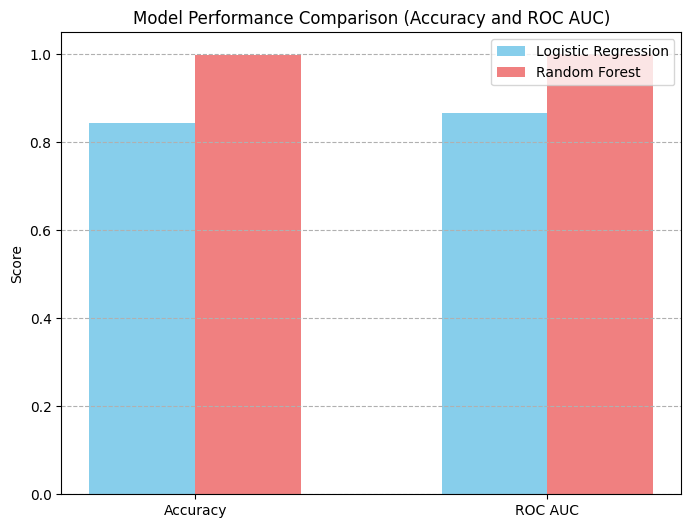

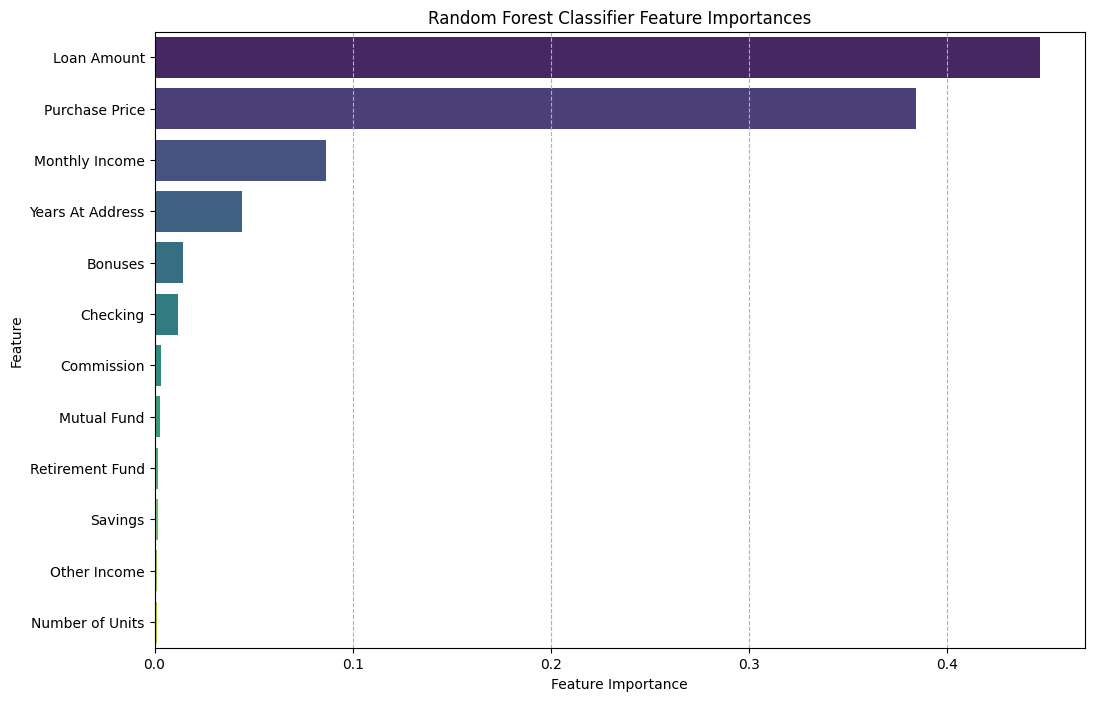

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Create a bar plot comparing the accuracy and ROC AUC scores
metrics = ['Accuracy', 'ROC AUC']
log_reg_scores = [accuracy_log_reg, roc_auc_log_reg]
rf_clf_scores = [accuracy_rf_clf, roc_auc_rf_clf]

x = range(len(metrics))

plt.figure(figsize=(8, 6))
plt.bar(x, log_reg_scores, width=0.3, label='Logistic Regression', color='skyblue')
plt.bar([i + 0.3 for i in x], rf_clf_scores, width=0.3, label='Random Forest', color='lightcoral')
plt.ylabel('Score')
plt.title('Model Performance Comparison (Accuracy and ROC AUC)')
plt.xticks([i + 0.15 for i in x], metrics)
plt.legend()
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--')
plt.show()

# 3. Extract and visualize feature importances for Random Forest Classifier
if hasattr(best_rf_clf, 'feature_importances_'):
    feature_importances = pd.Series(best_rf_clf.feature_importances_, index=X_train.columns)
    feature_importances = feature_importances.sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Random Forest Classifier Feature Importances')
    plt.grid(axis='x', linestyle='--')
    plt.show()
else:
    print("Random Forest Classifier does not have feature importances.")

## Summary:

### Data Analysis Key Findings

*   The dataset contained no missing values and all features were numerical.
*   Outliers were identified in several numerical columns and handled by capping values at the 99th percentile.
*   Numerical features were scaled using `StandardScaler`.
*   The data was split into training (80%) and testing (20%) sets.
*   Hyperparameter tuning using `GridSearchCV` found the best parameters for Logistic Regression to be `{'C': 100, 'penalty': 'l2'}` and for Random Forest Classifier to be `{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}`.
*   The tuned Random Forest Classifier model achieved significantly higher performance metrics on the testing set compared to the tuned Logistic Regression model, with an accuracy of approximately 0.9983 and a ROC AUC of 1.0000.

### Insights or Next Steps

*   The Random Forest Classifier model shows outstanding performance on this dataset, indicating its strong capability in predicting loan defaults.
*   Further analysis could focus on interpreting the most important features identified by the Random Forest model to gain business insights into the key drivers of loan default.
